In [2]:
import splitfolders

dataset = 'Data\\dataset'

splitfolders.ratio(dataset, output='Data\\tmp\\kopi2', seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  1.99 files/s]
Copying files: 4 files [00:00,  2.73 files/s]
Copying files: 5 files [00:00,  3.46 files/s]
Copying files: 8 files [00:00,  4.59 files/s]
Copying files: 10 files [00:01,  4.87 files/s]
Copying files: 11 files [00:01,  5.30 files/s]
Copying files: 13 files [00:01,  6.49 files/s]
Copying files: 15 files [00:01,  7.43 files/s]
Copying files: 17 files [00:01,  8.64 files/s]
Copying files: 19 files [00:02,  9.63 files/s]
Copying files: 21 files [00:02,  9.60 files/s]
Copying files: 23 files [00:02,  9.94 files/s]
Copying files: 25 files [00:02,  8.49 files/s]
Copying files: 26 files [00:02,  8.53 files/s]
Copying files: 27 files [00:03,  6.73 files/s]
Copying files: 28 files [00:03,  6.13 files/s]
Copying files: 30 files [00:03,  7.55 files/s]
Copying files: 32 files [00:03,  8.98 files/s]
Copying files: 34 files [00:03,  8.07 files/s]
Copying files: 36 files [00:03,  8.92 files/s]
Copying files: 38 fil

Copying files: 649 files [01:11, 15.05 files/s]
Copying files: 652 files [01:11, 16.58 files/s]
Copying files: 654 files [01:11, 15.02 files/s]
Copying files: 656 files [01:11, 15.63 files/s]
Copying files: 659 files [01:11, 17.74 files/s]
Copying files: 661 files [01:11, 18.05 files/s]
Copying files: 663 files [01:12, 17.81 files/s]
Copying files: 665 files [01:12, 11.22 files/s]
Copying files: 667 files [01:13,  5.55 files/s]
Copying files: 669 files [01:13,  4.72 files/s]
Copying files: 671 files [01:14,  5.11 files/s]
Copying files: 672 files [01:14,  4.74 files/s]
Copying files: 673 files [01:14,  3.94 files/s]
Copying files: 674 files [01:14,  4.41 files/s]
Copying files: 675 files [01:14,  5.00 files/s]
Copying files: 676 files [01:15,  5.43 files/s]
Copying files: 678 files [01:15,  6.73 files/s]
Copying files: 682 files [01:15,  8.84 files/s]
Copying files: 684 files [01:15,  9.65 files/s]
Copying files: 687 files [01:15, 11.38 files/s]
Copying files: 689 files [01:15, 11.97 f

In [2]:
import os
train_dir = os.path.join('Data\\tmp\\kopi\\train')
val_dir = os.path.join('Data\\tmp\\kopi\\val')

In [3]:
os.listdir(train_dir)

['healthy', 'rust']

In [6]:
os.listdir(val_dir)

['healthy', 'rust']

In [4]:
import tensorflow as tf

train_rust_dir = os.path.join(train_dir, 'healthy')
train_miner_dir = os.path.join(train_dir, 'rust')

validation_rust_dir = os.path.join(val_dir, 'healthy')
validation_miner_dir = os.path.join(val_dir, 'rust')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(150, 150), 
    batch_size = 6,
    class_mode = 'binary' 
)

validation_generator = test_datagen.flow_from_directory(
    val_dir, 
    target_size = (150, 150), 
    batch_size = 6,
    class_mode = 'binary' 
)

Found 1264 images belonging to 2 classes.
Found 318 images belonging to 2 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy','AUC'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [43]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max')

In [44]:
history = model.fit(
    train_generator,
    
    steps_per_epoch = 25, 
    epochs = 50,
    validation_data = validation_generator, 
    validation_steps = 5, 
    verbose = 2)
return history

Epoch 1/50
25/25 - 28s - loss: 0.5753 - accuracy: 0.6400 - auc: 0.7401 - val_loss: 0.6696 - val_accuracy: 0.6333 - val_auc: 0.5324
Epoch 2/50
25/25 - 26s - loss: 0.5931 - accuracy: 0.6533 - auc: 0.7258 - val_loss: 0.6160 - val_accuracy: 0.6333 - val_auc: 0.8281
Epoch 3/50
25/25 - 25s - loss: 0.5959 - accuracy: 0.6400 - auc: 0.7155 - val_loss: 0.5953 - val_accuracy: 0.6667 - val_auc: 0.8254
Epoch 4/50
25/25 - 26s - loss: 0.5971 - accuracy: 0.6733 - auc: 0.6686 - val_loss: 0.5118 - val_accuracy: 0.7333 - val_auc: 0.8415
Epoch 5/50
25/25 - 23s - loss: 0.6338 - accuracy: 0.6284 - auc: 0.6282 - val_loss: 0.6373 - val_accuracy: 0.5667 - val_auc: 0.7105
Epoch 6/50
25/25 - 25s - loss: 0.5918 - accuracy: 0.6533 - auc: 0.7042 - val_loss: 0.5636 - val_accuracy: 0.6333 - val_auc: 0.8089
Epoch 7/50
25/25 - 25s - loss: 0.5742 - accuracy: 0.6824 - auc: 0.7389 - val_loss: 0.4064 - val_accuracy: 0.8000 - val_auc: 0.8616
Epoch 8/50
25/25 - 24s - loss: 0.5495 - accuracy: 0.6667 - auc: 0.7924 - val_loss: 

SyntaxError: 'return' outside function (<ipython-input-44-dd38fae09e91>, line 9)

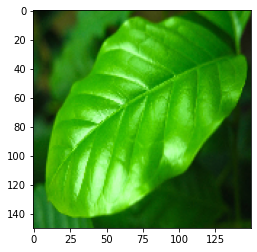

Healthy


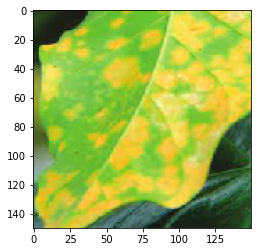

Rust


In [56]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
data = 'Data\\test'
for i in os.listdir(data):
    img = image.load_img(data+"\\"+i, target_size=(150,150))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Healthy")
    else:
        print("Rust")

In [58]:
model.save("Data")

INFO:tensorflow:Assets written to: Data//assets\assets


In [38]:
labels = train_generator.class_indices.keys()
print(labels)

dict_keys(['healthy', 'rust'])


In [41]:
test_loss, test_acc = model.evaluate(data, labels, verbose = 2)
print(test_acc)

ValueError: Failed to find data adapter that can handle input: <class 'str'>, <class 'dict_keys'>